In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.pipeline import Pipeline
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam


In [ ]:
!pip install catboost

In [ ]:
from catboost import CatBoostRegressor

In [ ]:
book_df = pd.read_csv('data.csv')

In [ ]:
# Display basic information
print("Data Info:")
print(book_df.info())
print("\nFirst few rows:")
print(book_df.head())

Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Pages           1000 non-null   int64 
 1   Category        1000 non-null   object
 2   Color Printing  1000 non-null   int64 
 3   Paper Type      1000 non-null   object
 4   Price           1000 non-null   int64 
dtypes: int64(3), object(2)
memory usage: 39.2+ KB
None

First few rows:
   Pages   Category  Color Printing    Paper Type  Price
0    207  Technical               0  Offset Paper     60
1    210  Technical               0  Offset Paper     62
2    206  Technical               0  Offset Paper     62
3    218  Technical               0  Offset Paper     64
4    209  Technical               0  Offset Paper     60


In [ ]:
# Data Analytics
print("\nValue counts for each column:")
print(book_df['Category'].value_counts())
print(book_df['Paper Type'].value_counts())


Value counts for each column:
Category
Technical      336
Educational    333
Office         331
Name: count, dtype: int64
Paper Type
Offset Paper     615
Coated Paper     196
Writing Paper    189
Name: count, dtype: int64


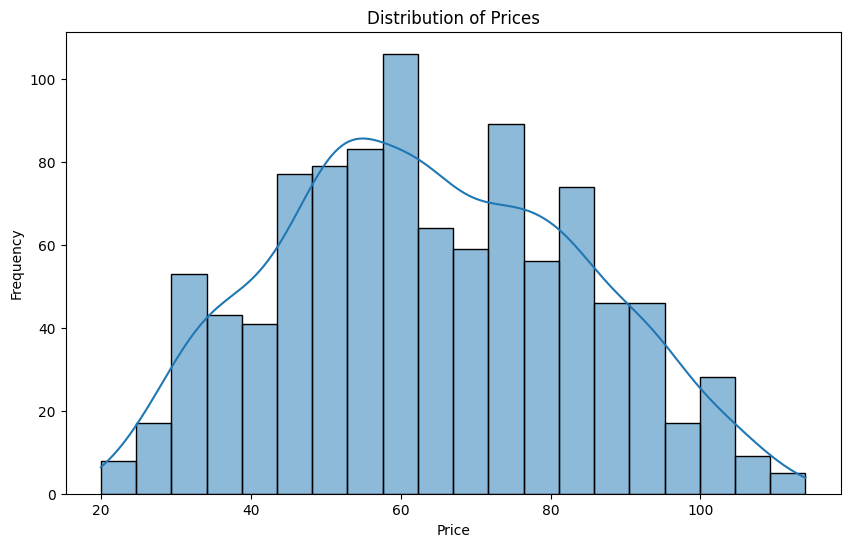

In [ ]:
# Data Visualization
plt.figure(figsize=(10, 6))
sns.histplot(book_df['Price'], bins=20, kde=True)
plt.title('Distribution of Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

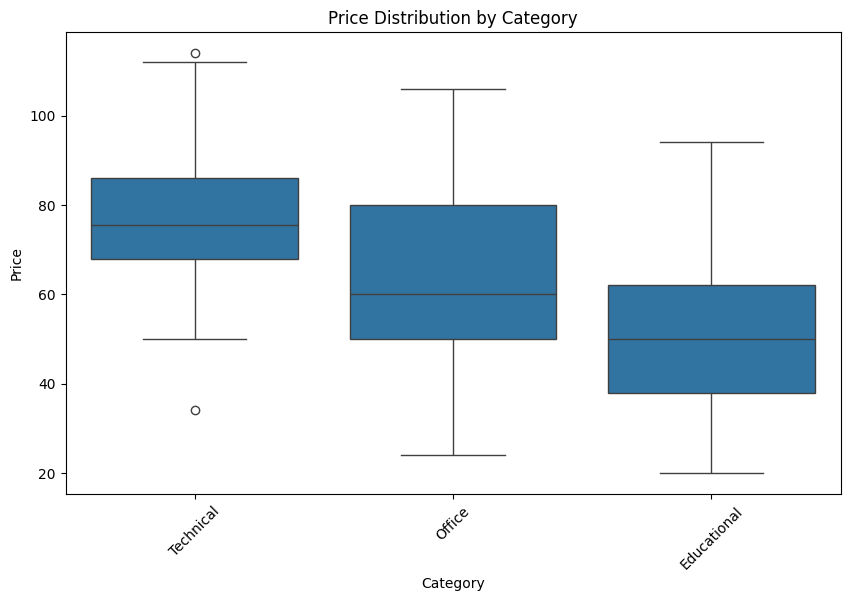

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Category', y='Price', data=book_df)
plt.title('Price Distribution by Category')
plt.xlabel('Category')
plt.ylabel('Price')
plt.xticks(rotation=45)
plt.show()

In [ ]:
# Convert categorical variables to numerical
le = LabelEncoder()
book_df['Category'] = le.fit_transform(book_df['Category'])
book_df['Paper Type'] = le.fit_transform(book_df['Paper Type'])

In [ ]:
# Check for any missing values
print("\nMissing values:")
print(book_df.isnull().sum())


Missing values:
Pages             0
Category          0
Color Printing    0
Paper Type        0
Price             0
dtype: int64


In [ ]:
# Separate features and target variable
X = book_df.drop(columns='Price')
y = book_df['Price']

In [ ]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)


In [ ]:
# Preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), X.columns)  # Apply StandardScaler to all numerical features
    ],
    remainder='passthrough'
)

In [ ]:
X_train_preprocessed = preprocessor.fit_transform(X_train)
X_test_preprocessed = preprocessor.transform(X_test)

In [ ]:
# Train and evaluate machine learning models

models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(random_state=123),
    'Gradient Boosting': GradientBoostingRegressor(random_state=123),
    'AdaBoost': AdaBoostRegressor(random_state=123),
    'K-Nearest Neighbors': KNeighborsRegressor(),
    'Support Vector Regressor': SVR(),
    'GBDT (Gradient Boosting Decision Tree)': GradientBoostingRegressor(random_state=123),
    'CatBoost': CatBoostRegressor(learning_rate=0.1, depth=6, iterations=500, random_state=123, verbose=0)
}

In [ ]:
results = {}

for name, model in models.items():
    model.fit(X_train_preprocessed, y_train)
    y_pred = model.predict(X_test_preprocessed)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    results[name] = {'MSE': mse, 'R^2': r2}
    print(f"{name} - MSE: {mse:.2f}, R^2: {r2:.2f}")

Linear Regression - MSE: 62.72, R^2: 0.83
Random Forest - MSE: 40.19, R^2: 0.89
Gradient Boosting - MSE: 46.30, R^2: 0.87
AdaBoost - MSE: 85.75, R^2: 0.76
K-Nearest Neighbors - MSE: 41.83, R^2: 0.89
Support Vector Regressor - MSE: 55.99, R^2: 0.85
GBDT (Gradient Boosting Decision Tree) - MSE: 46.30, R^2: 0.87
CatBoost - MSE: 42.94, R^2: 0.88


In [ ]:
# Train and evaluate deep learning model

def build_deep_learning_model(input_dim):
    model = Sequential([
        Dense(64, input_dim=input_dim, activation='relu'),
        Dense(32, activation='relu'),
        Dense(1)
    ])
    model.compile(optimizer=Adam(), loss='mean_squared_error')
    return model


In [ ]:
deep_model = build_deep_learning_model(X_train_preprocessed.shape[1])
history = deep_model.fit(X_train_preprocessed, y_train, epochs=50, validation_split=0.2, verbose=1)

Epoch 1/50
20/20 [==============================] - 1s 9ms/step - loss: 4488.2744 - val_loss: 4346.3721
Epoch 2/50
20/20 [==============================] - 0s 4ms/step - loss: 4353.2642 - val_loss: 4193.8921
Epoch 3/50
20/20 [==============================] - 0s 7ms/step - loss: 4165.3193 - val_loss: 3971.0044
Epoch 4/50
20/20 [==============================] - 0s 7ms/step - loss: 3887.2974 - val_loss: 3643.4270
Epoch 5/50
20/20 [==============================] - 0s 7ms/step - loss: 3489.6235 - val_loss: 3182.0864
Epoch 6/50
20/20 [==============================] - 0s 4ms/step - loss: 2950.9419 - val_loss: 2586.9119
Epoch 7/50
20/20 [==============================] - 0s 4ms/step - loss: 2293.8362 - val_loss: 1898.1266
Epoch 8/50
20/20 [==============================] - 0s 4ms/step - loss: 1577.7971 - val_loss: 1221.1667
Epoch 9/50
20/20 [==============================] - 0s 4ms/step - loss: 936.4336 - val_loss: 668.4281
Epoch 10/50
20/20 [==============================] - 0s 4ms/step -

In [ ]:
# Evaluate deep learning model
y_pred_dl = deep_model.predict(X_test_preprocessed)
mse_dl = mean_squared_error(y_test, y_pred_dl)
r2_dl = r2_score(y_test, y_pred_dl)
results['Deep Learning'] = {'MSE': mse_dl, 'R^2': r2_dl}

7/7 [==============================] - 0s 4ms/step


In [ ]:
print(f"Deep Learning Model - MSE: {mse_dl:.2f}, R^2: {r2_dl:.2f}")

Deep Learning Model - MSE: 65.84, R^2: 0.82


In [ ]:
# Print results for all models
print("\nAll Model Results:")
results_df = pd.DataFrame(results).T
print(results_df)


All Model Results:
                                              MSE       R^2
Linear Regression                       62.718642  0.828082
Random Forest                           40.193626  0.889825
Gradient Boosting                       46.295501  0.873100
AdaBoost                                85.748902  0.764954
K-Nearest Neighbors                     41.831200  0.885337
Support Vector Regressor                55.992593  0.846519
GBDT (Gradient Boosting Decision Tree)  46.295501  0.873100
CatBoost                                42.938679  0.882301
Deep Learning                           65.836036  0.819537


In [ ]:
# Identify the best model
best_model_name = results_df['R^2'].idxmax()
best_model_r2 = results_df['R^2'].max()
best_model_mse = results_df.loc[best_model_name, 'MSE']

print(f"\nBest Model: {best_model_name}")
print(f"R^2: {best_model_r2:.2f}")
print(f"MSE: {best_model_mse:.2f}")


Best Model: Random Forest
R^2: 0.89
MSE: 40.19


In [ ]:
# Save model performances
results_df.to_csv('model_performance.csv', index=True)